Regression:
- linear regression (matrix methods)
- ridge regression
- lasso 


Refrences:
- https://www.statsmodels.org/stable/glm.html#link-functions
- Medium
- Geeks for Geeks
- toward datascience

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
import seaborn as sns

In [92]:
train=pd.read_csv("MaterialStrength_Train.csv")
test = pd.read_csv("MaterialStrength_Test.csv")

In [93]:
# Check for duplicates in the entire DataFrame
duplicate_rows = train[train.duplicated()]

# Check the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]
print("Number of Duplicate :",num_duplicates )

# Removing duplicates from datasets
train = train.drop_duplicates()
train.shape

Number of Duplicate : 24


(776, 9)

In [94]:

# Check for duplicates in the entire DataFrame
duplicate_rows = test[test.duplicated()]

# Check the number of duplicate rows
duplicate_rows.shape[0]

1

In [95]:
trainc=train.copy()

In [96]:
testc=test.copy()

In [97]:
testc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              230 non-null    float64
 1   blast_furnace_slag  230 non-null    float64
 2   fly_ash             230 non-null    float64
 3   water               230 non-null    float64
 4   superplasticizer    230 non-null    float64
 5   coarse_aggregate    230 non-null    float64
 6   fine_aggregate      230 non-null    float64
 7   age                 230 non-null    int64  
 8   material_strength   0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 16.3 KB


PART 1 --> DATA CLEANING

Will perform the following activities

1. Shape of train and test sets
2. Check for null values and drop  or impute them (if any)
3. Check for outliers and drop them (if any)
4. Type conversion of relevant fields (if required)

In [98]:
# see the  training dataset
train.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [99]:
# Check no of rows & columns in the dataset
print("Shape of the Training data :", train.shape)

# See all the columns in the dataset
print("All columns are :", list(train.columns))

Shape of the Training data : (776, 9)
All columns are : ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age', 'Material Strength']


In [100]:
# Check datatypes & count of non-null values in each field
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              776 non-null    float64
 1   blast_furnace_slag  776 non-null    float64
 2   fly_ash             776 non-null    float64
 3   water               776 non-null    float64
 4   superplasticizer    776 non-null    float64
 5   coarse_aggregate    776 non-null    float64
 6   fine_aggregate      776 non-null    float64
 7   age                 776 non-null    int64  
 8   Material Strength   776 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 60.6 KB


Observation:
    
    1. Dataset does not contain any categorical features
    2. there are 8 attributes 
    

In [101]:
# Check datatypes & count of not-null values in each field
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              230 non-null    float64
 1   blast_furnace_slag  230 non-null    float64
 2   fly_ash             230 non-null    float64
 3   water               230 non-null    float64
 4   superplasticizer    230 non-null    float64
 5   coarse_aggregate    230 non-null    float64
 6   fine_aggregate      230 non-null    float64
 7   age                 230 non-null    int64  
 8   material_strength   0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 16.3 KB


In [102]:
#check for missing values in train data
train.isnull().sum()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
Material Strength     0
dtype: int64

In [103]:
[features for features in train.columns if train[features].isnull().sum()>0]

[]

training set doesnot contain any missing values

In [104]:
 # which value  of age has largest and lowest frequency in the training datasets

# Create a Pandas Series
series = pd.Series(train.age)

# Get value counts
value_counts = series.value_counts()

# Calculate percentages
percentages = value_counts / len(series) * 100

# Create a DataFrame to display the results
result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts, 'Percentage': percentages})

print(result_df)

     Value  Count  Percentage
age                          
28      28    208   26.804124
3        3    126   16.237113
7        7    116   14.948454
56      56     86   11.082474
14      14     60    7.731959
100    100     52    6.701031
90      90     51    6.572165
180    180     24    3.092784
91      91     17    2.190722
365    365     14    1.804124
270    270     12    1.546392
360    360      5    0.644330
120    120      3    0.386598
1        1      2    0.257732


To understand how values are distibuted in each attributes 

In [105]:
train. describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,289.562500,65.136985,49.289948,180.386340,5.447680,988.008634,777.434021,50.050258,35.924188
std,103.764355,85.653577,61.897938,22.232729,6.185539,72.079540,82.966435,69.931515,17.165696
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,212.000000,0.000000,0.000000,162.000000,0.000000,938.200000,745.000000,7.000000,22.817500
50%,275.000000,13.600000,0.000000,185.700000,4.550000,977.300000,780.700000,28.000000,34.835000
75%,365.450000,128.125000,118.225000,192.000000,9.900000,1047.000000,834.550000,56.000000,47.710000
max,540.000000,359.400000,174.700000,228.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


obsevations:
1. Values in fly_ash mostly has small numbers, with a lot of zeros,but there are a few really big numbers that make the overall pattern not very balanced.
2. blast_furnace_slag's data is not spread out evenly; it's "skewed" towards the smaller values, especially 0.
3. superplasticizer seems to have relatively low values, with a median of 5.25, indicating it might not be used extensively.        while the coarse aggregate has a fairly high mean value of 985.55

In [106]:
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images" / "Regression.ipynb"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## Visualising  Datasets

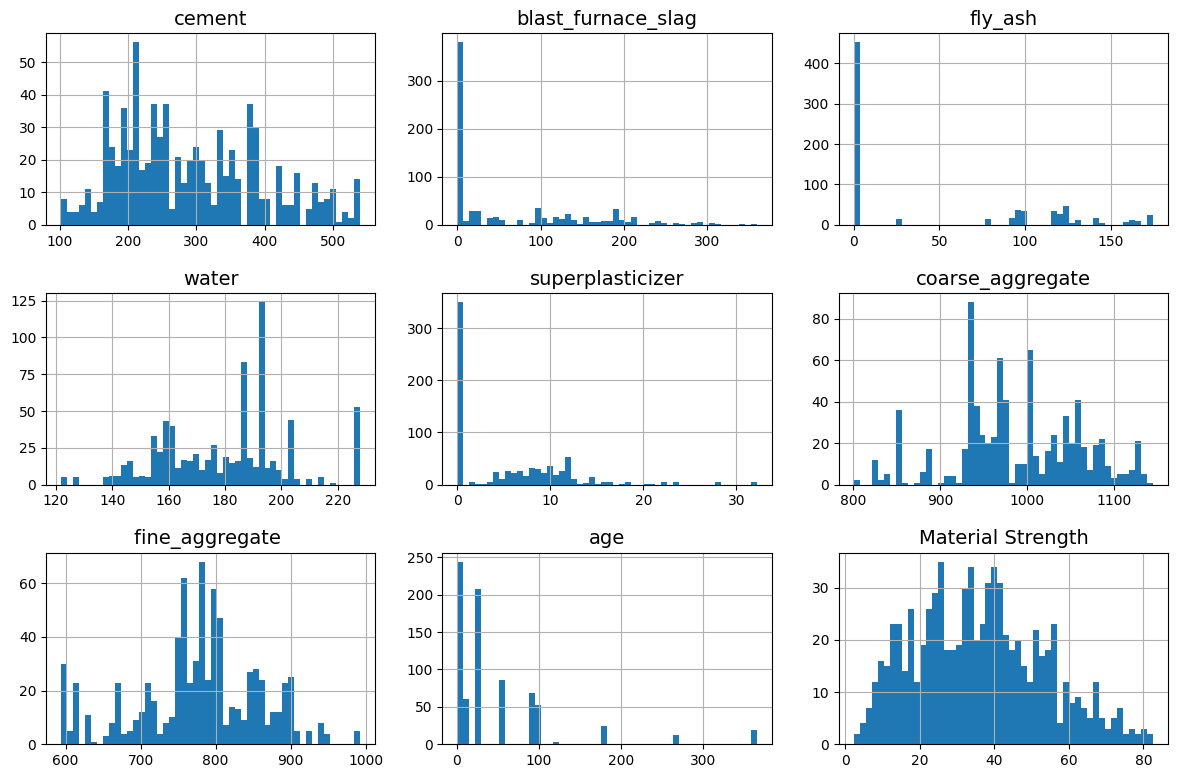

In [107]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

train.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

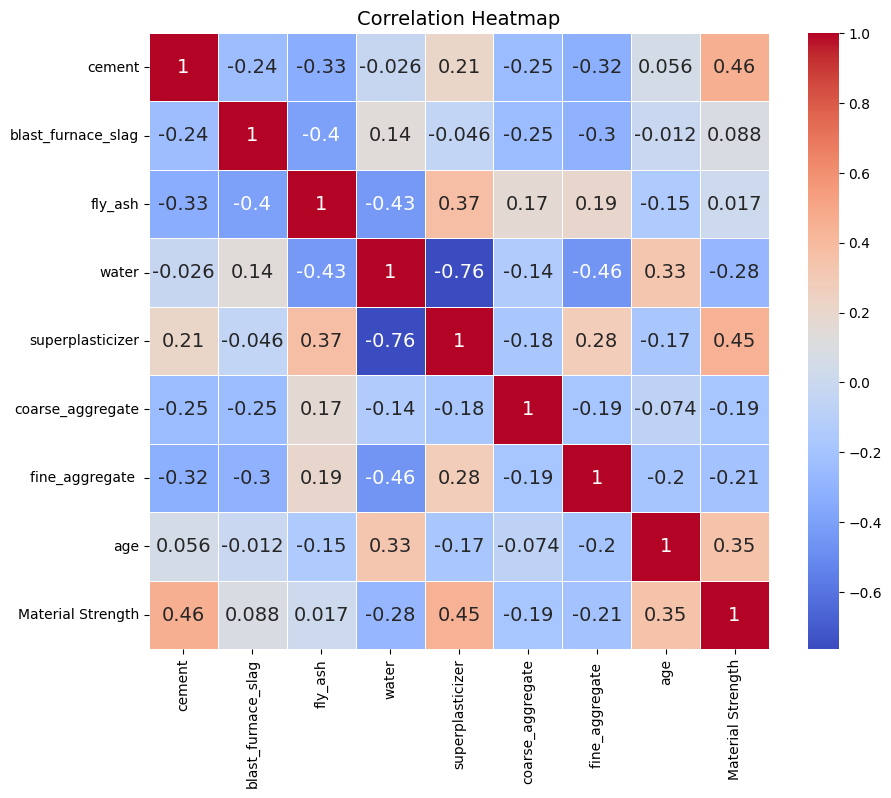

In [108]:
# Create a correlation matrix 
correlation_matrix = trainc.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')  # Set the plot title
plt.show()

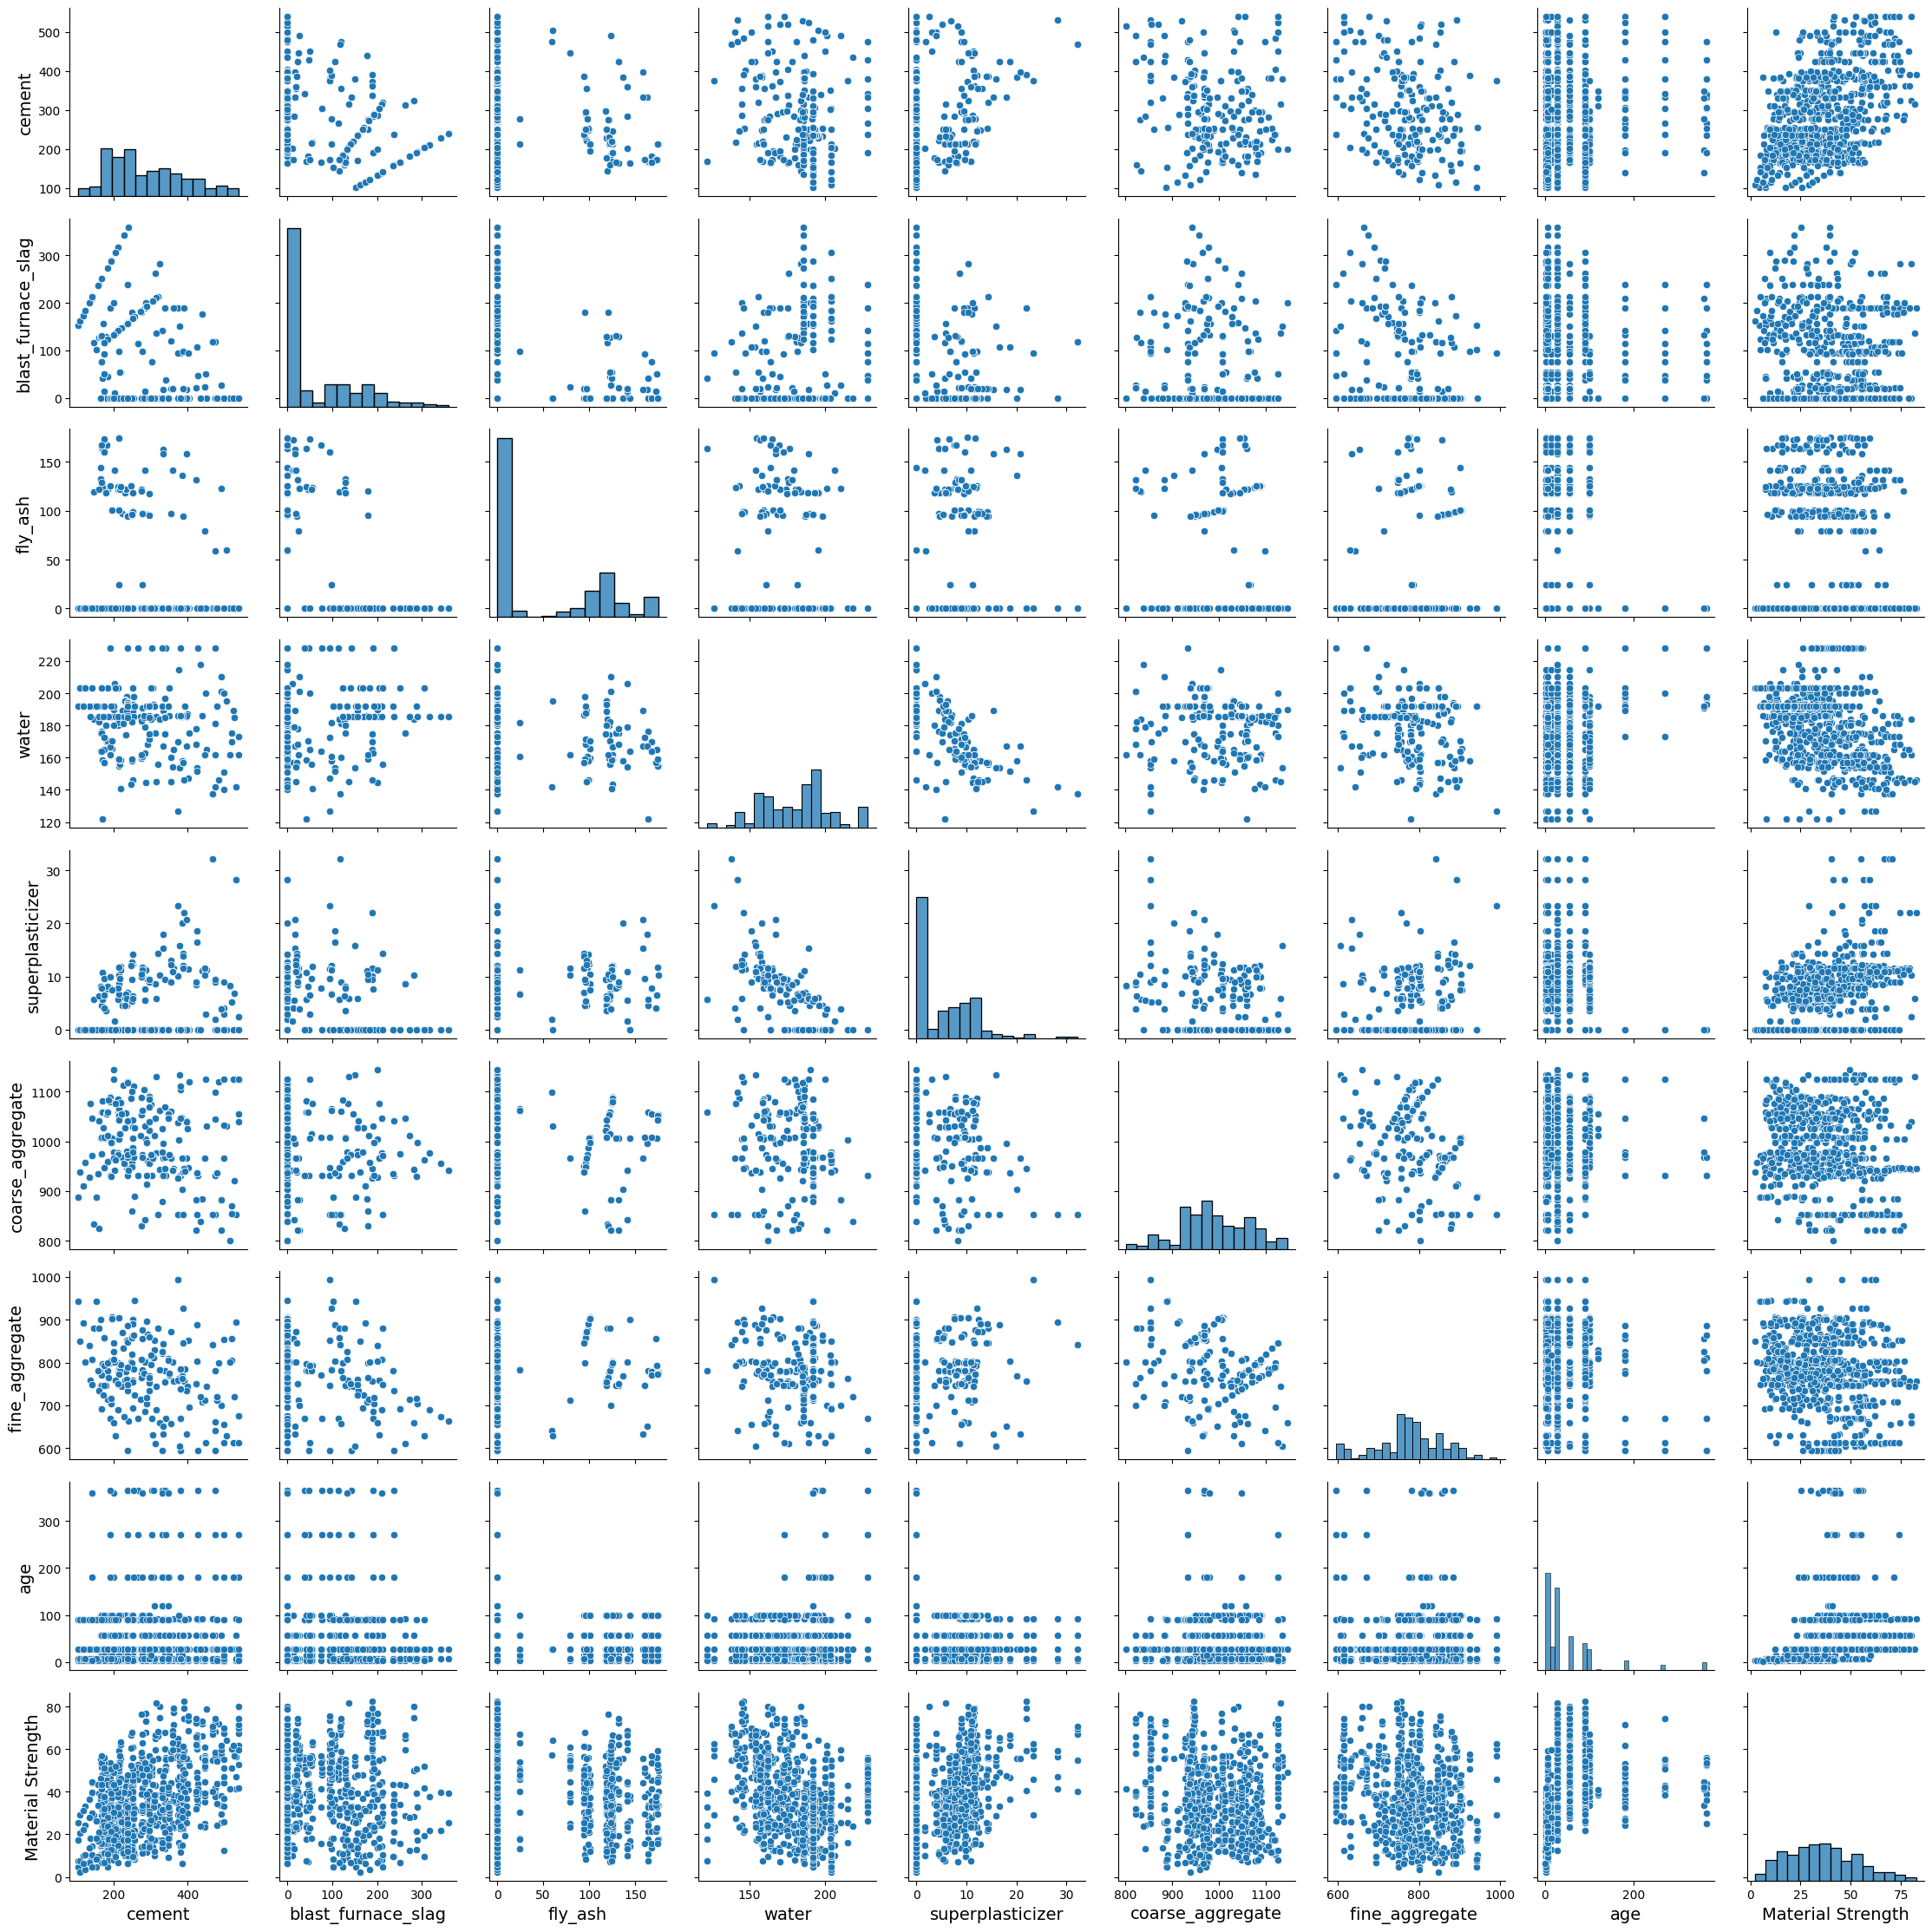

In [109]:
# 4. Feature Relationships (scatter matrix)
sns.pairplot(trainc)
save_fig('Relationships between attributes')
plt.show()

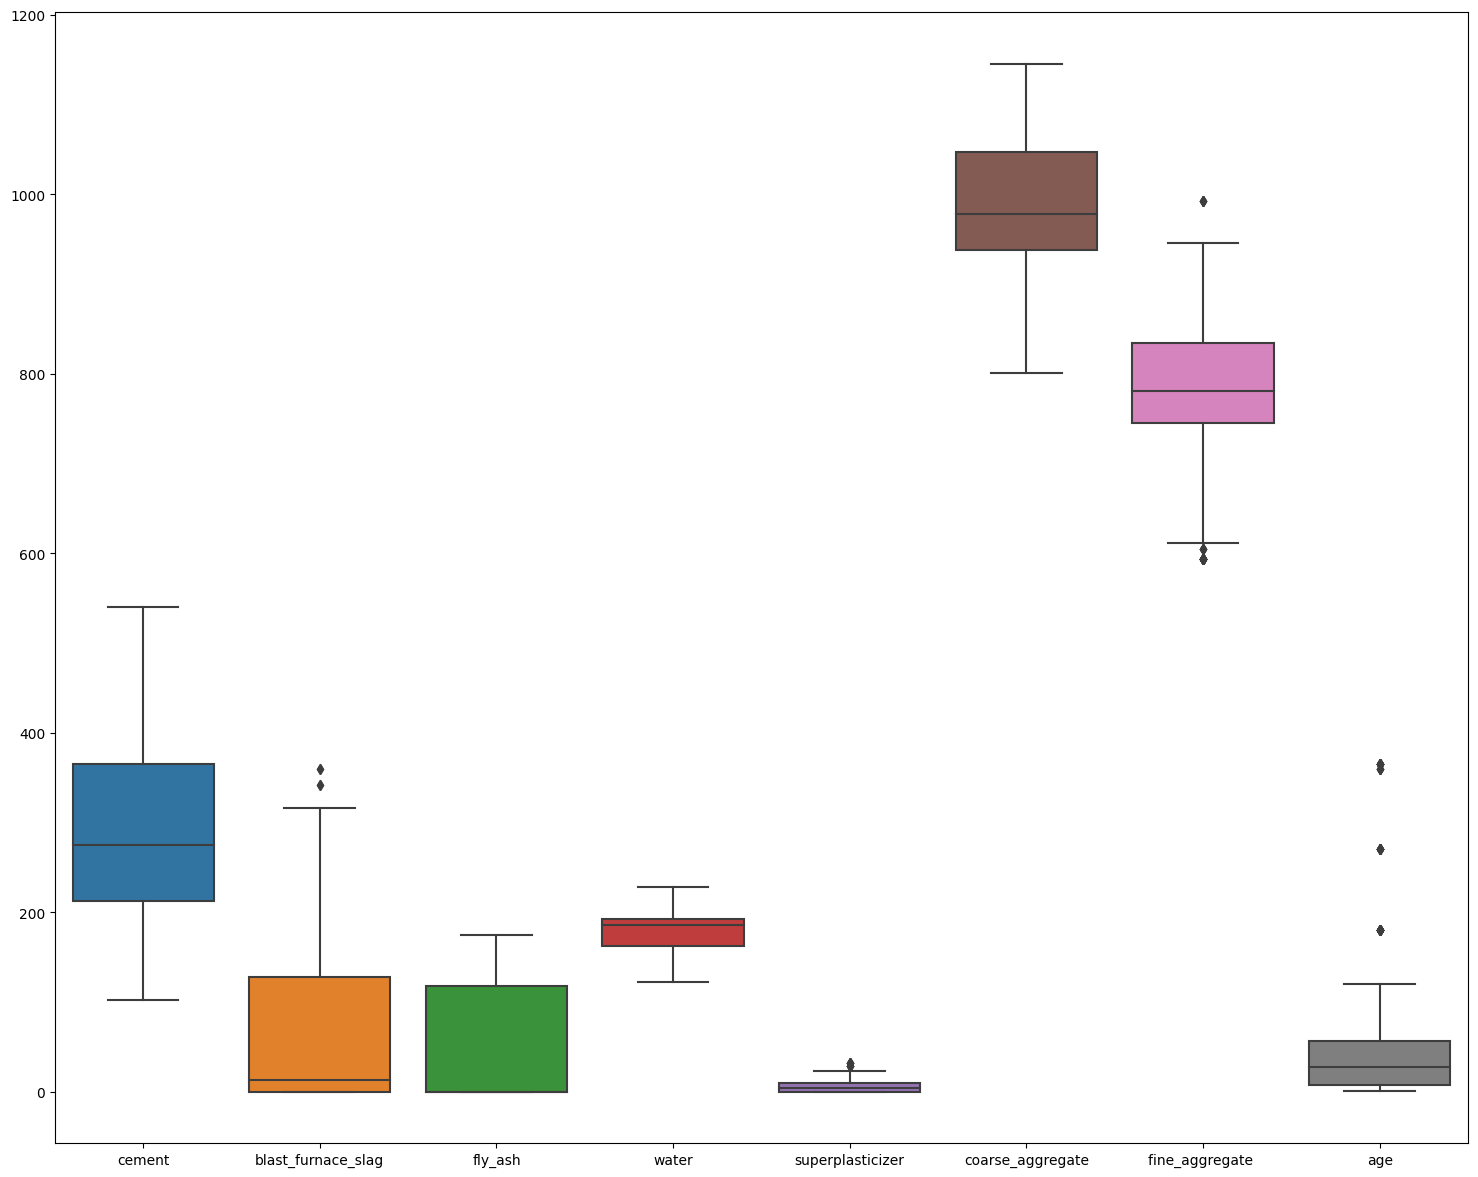

In [110]:
# Outlier Detection (box plots)
data=train.drop(columns='Material Strength')
plt.figure(figsize=(15, 12))
sns.boxplot(data=data)
plt.tight_layout()
save_fig("box-Plot")
plt.show()

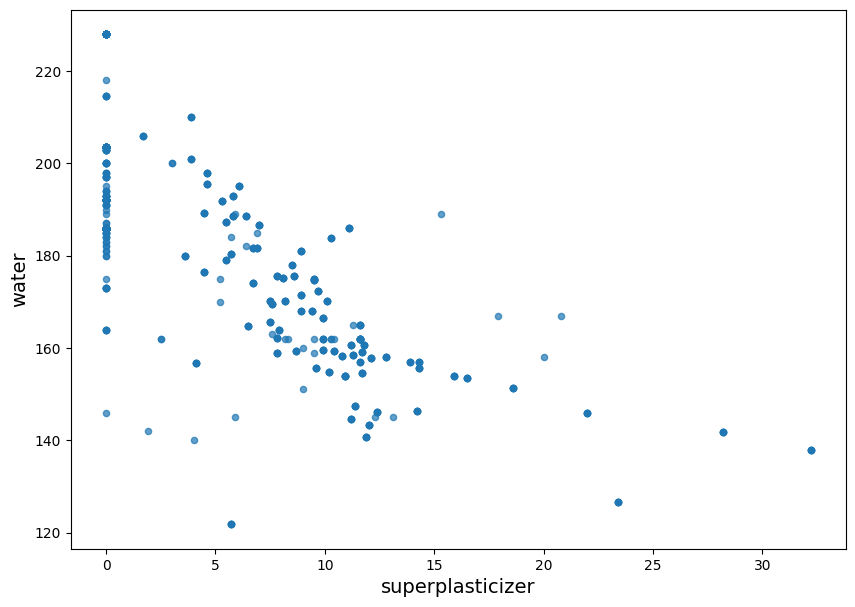

In [111]:
train.plot(kind="scatter", x="superplasticizer", y="water", figsize=(10, 7), alpha=0.7)
plt.show()

 ## To understand the distribution of each attributes using plots

Note:
1. blast_furnace_slag, superplasticizer, fly_ash and age are not evenly spreaded instead  they are skewed towards 0 and contains outlier 
2. fine_aggregate values are larger than other attributes
3. cement shows higher varience density

In [112]:
corr_matrix = trainc.corr()
corr_matrix["Material Strength"].sort_values(ascending=False)

Material Strength     1.000000
cement                0.460156
superplasticizer      0.447484
age                   0.352323
blast_furnace_slag    0.088163
fly_ash               0.017349
coarse_aggregate     -0.186456
fine_aggregate       -0.208380
water                -0.278982
Name: Material Strength, dtype: float64

<Axes: >

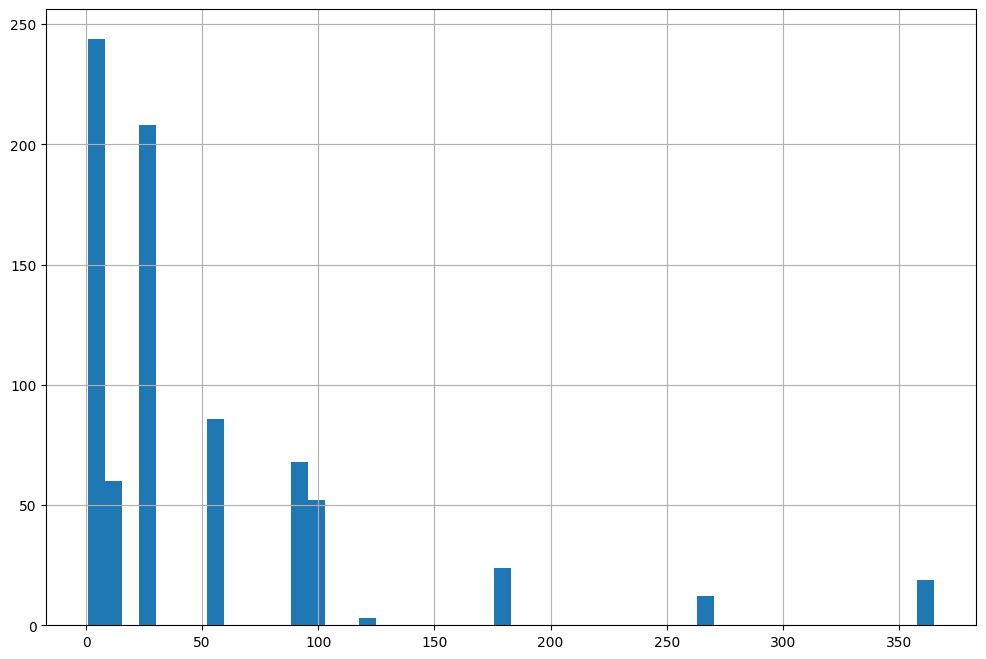

In [113]:
train['age'].hist(bins=50, figsize=(12, 8))

In [114]:
#Remove outliers


# calculate summary statistics
age_mean = train["age"].mean(),
age_std =  train["age"].std()
# identify outliers
age_cut_off = age_std * 3
lower, upper = age_mean - age_cut_off, age_mean + age_cut_off
# identify outliers
outliers = [x for x in train["age"] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
#train = train[(train["age"] >= lower[0]) & (train["age"] <= upper[0])]

Identified outliers: 31


In [115]:
# calculate summary statistics
fine_aggregate_mean = train["fine_aggregate "].mean(),
fine_aggregate_std =  train["fine_aggregate "].std()
# identify outliers
fine_aggregate_cut_off = age_std * 3
lower, upper = fine_aggregate_mean - fine_aggregate_cut_off, fine_aggregate_mean + fine_aggregate_cut_off
# identify outliers
outliers = [x for x in train["fine_aggregate "] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
#train = train[(train["fine_aggregate "] >= lower[0]) & (train["fine_aggregate "] <= upper[0])]

Identified outliers: 5


In [116]:
# calculate summary statistics
blast_furnace_slag_mean = train["blast_furnace_slag"].mean(),
blast_furnace_slag_std =  train["blast_furnace_slag"].std()
# identify outliers
blast_furnace_slag_cut_off = age_std * 3
lower, upper = blast_furnace_slag_mean - blast_furnace_slag_cut_off, blast_furnace_slag_mean + blast_furnace_slag_cut_off
# identify outliers
outliers = [x for x in train["blast_furnace_slag"] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
#train = train[(train["fine_aggregate "] >= lower[0]) & (train["fine_aggregate "] <= upper[0])]

Identified outliers: 20


## Transforming values
     
- Scaling
- Box-transformation

using these transforming techniques to remove outlier from the datasets



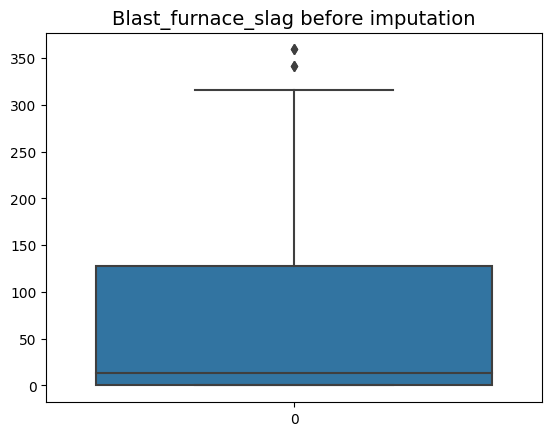

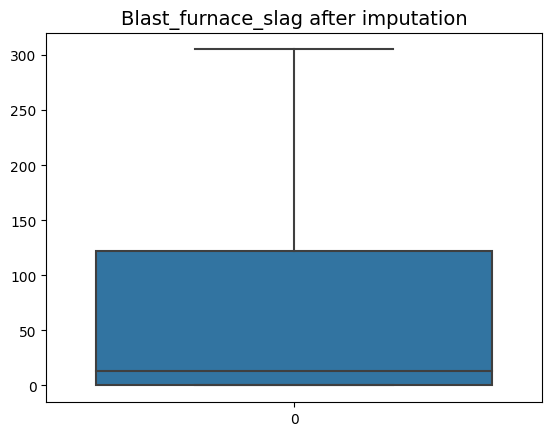

In [117]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
c=scaler.fit_transform(train['blast_furnace_slag'].values.reshape(-1,1))

sns.boxplot(train['blast_furnace_slag'])
plt.title("Blast_furnace_slag before imputation")
plt.show()
for i in train['blast_furnace_slag']:
    q1=train['blast_furnace_slag'].quantile(0.25)
    q3=train['blast_furnace_slag'].quantile(0.75)
    iqr=q3-q1
    lower_tail=q1-1.5*iqr
    upper_tail = q3+1.5*iqr
    
    if i>upper_tail or i <lower_tail:
        train['blast_furnace_slag'] = train['blast_furnace_slag'].replace(i,np.mean(train['blast_furnace_slag']))
        
sns.boxplot(train['blast_furnace_slag'])
plt.title("Blast_furnace_slag after imputation")

plt.show()



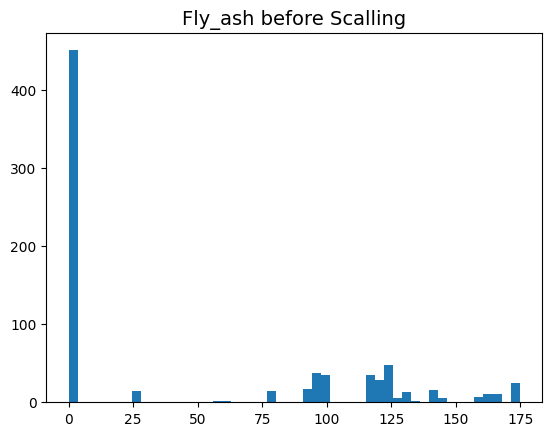

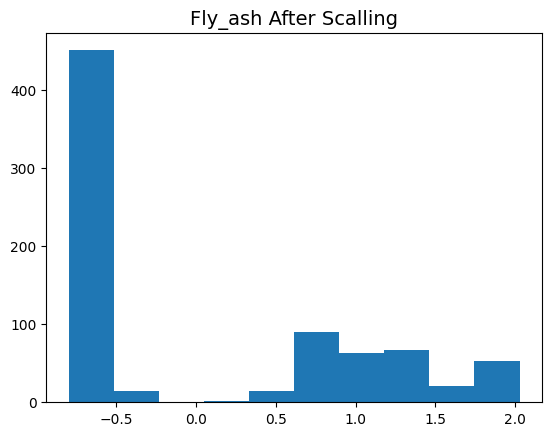

In [118]:
plt.hist(train['fly_ash'], bins=50)
plt.title("Fly_ash before Scalling")
plt.show()

d=scaler.fit_transform(train['fly_ash'].values.reshape(-1,1))
plt.hist(d)
plt.title("Fly_ash After Scalling")
plt.show()


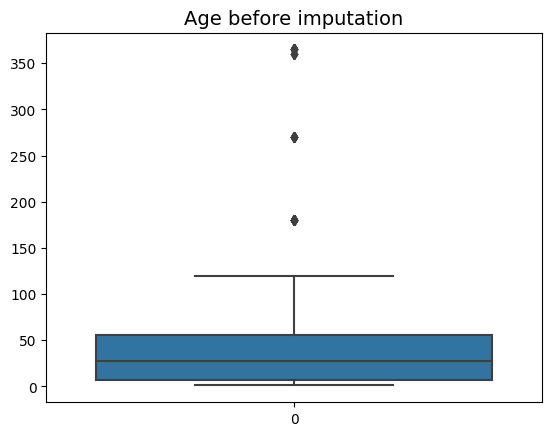

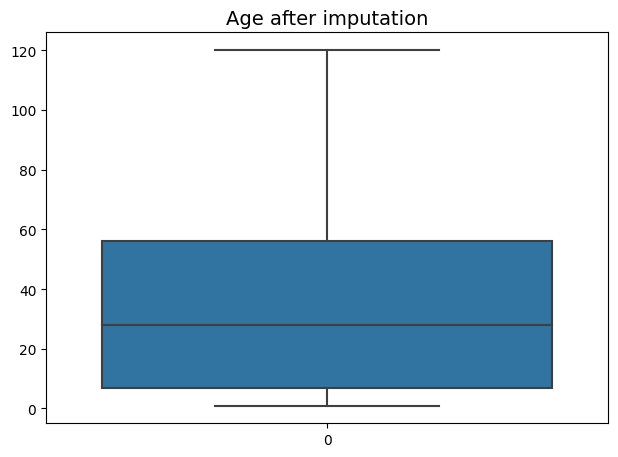

In [119]:
sns.boxplot(train['age'])
plt.title("Age before imputation")
plt.show()
for i in train['age']:
    q1=train['age'].quantile(0.25)
    q3=train['age'].quantile(0.75)
    iqr=q3-q1
    lower_tail=q1-1.5*iqr
    upper_tail = q3+1.5*iqr
    
    if i>upper_tail or i <lower_tail:
        train['age'] = train['age'].replace(i,np.mean(train['age']))
        
sns.boxplot(train['age'])
plt.title("Age after imputation")

save_fig("Age before and after imputation")
plt.show()

As our dataset is small instead of simply removing outlier we can impute outlier values with the mean values

In [120]:
corr_matrix = train.corr()

In [121]:
corr_matrix["Material Strength"].sort_values(ascending=False)

Material Strength     1.000000
age                   0.546500
cement                0.460156
superplasticizer      0.447484
blast_furnace_slag    0.099228
fly_ash               0.017349
coarse_aggregate     -0.186456
fine_aggregate       -0.208380
water                -0.278982
Name: Material Strength, dtype: float64

We see how imputation has increase the correlation between   age and material strength. before imputation it was 0.35  but after imputation the value increase to 0.55 

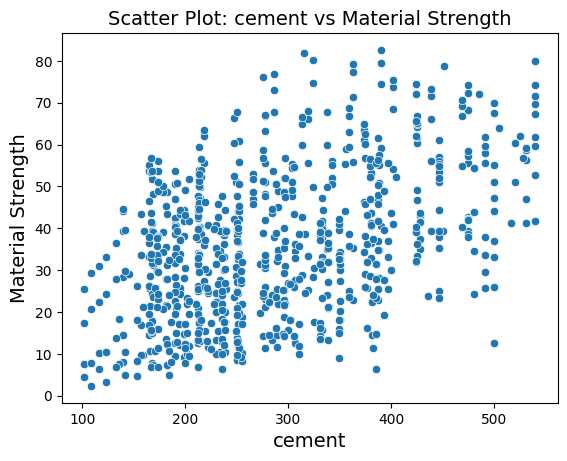

In [122]:
sns.scatterplot(x=train['cement'], y=trainc['Material Strength'])
plt.xlabel('cement')
plt.ylabel('Material Strength')
plt.title(f'Scatter Plot: cement vs Material Strength')
plt.show()

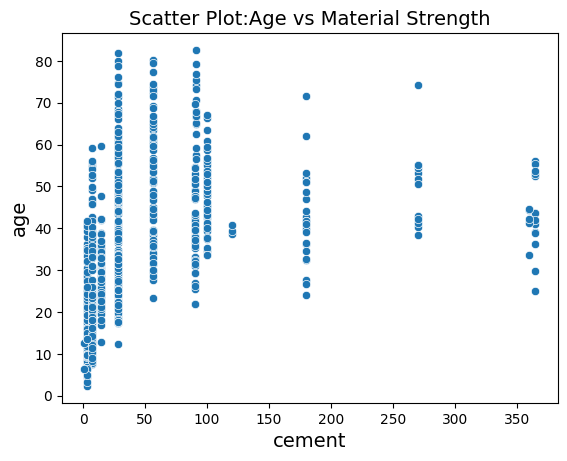

In [123]:
sns.scatterplot(x=trainc['age'], y=trainc['Material Strength'])
plt.xlabel('cement')
plt.ylabel('age')
plt.title(f'Scatter Plot:Age vs Material Strength')
plt.show()

 After imputation the correlation between age and strength of material increase also decrease outlier 

In [124]:
# Separate features (X) and target variable (y)
X = train.drop(columns=['Material Strength'])  # Remove the target column
y = train['Material Strength']

In [125]:
X.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.000000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.000000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,50.050258
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,46.648973
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,40.905527


In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

 checking the best attribute using  f_regression

In [127]:
from sklearn.feature_selection import SelectKBest, f_regression

# Replace X_train and y_train with your training data
selector = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features
X_new = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = X_train.columns[selected_indices]
selected_features


Index(['cement', 'water', 'superplasticizer', 'coarse_aggregate', 'age'], dtype='object')

In [128]:
print("Shape of training set :",X_train.shape) # Number of rows and column 
print("Shape of test set :",X_test.shape)

Shape of training set : (582, 8)
Shape of test set : (194, 8)


In [129]:
 # after scaling training set
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [130]:
X_train

array([[-0.96834011, -0.76662974,  1.1982259 , ...,  1.43430562,
         0.31111074,  0.70147785],
       [-0.73380706,  0.43106834, -0.42138204, ...,  1.11461329,
         0.10001427,  0.70147785],
       [ 0.7153078 , -0.53465968,  1.45234512, ..., -0.67913557,
         0.29135902, -1.02671133],
       ...,
       [-1.18191489, -0.25141202,  1.18375075, ...,  1.32870589,
         0.23210387, -1.02671133],
       [-1.22083739,  0.80222045,  1.30920202, ...,  0.24377715,
        -0.38019932,  2.13620095],
       [-0.01024764,  1.68614849, -0.81542767, ...,  0.22641829,
         0.32469004, -0.89628196]])

Trying different types of model to understand which model is best for my datasets  using r2 score  and rmse 

In [131]:
from sklearn.linear_model import Ridge, Lasso, BayesianRidge,LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression

li=LinearRegression()
rd = Ridge()
la = Lasso()
byrd = BayesianRidge()

models = [li,rd, la, byrd]
for model in models:
    mod = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_score = metrics.r2_score(y_test, y_pred).round(3)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred)).round(3)
    print('\n', model,'\n', 'R2_score:', r2_score,'\n', 'RMSE:', RMSE, '\n')


 LinearRegression() 
 R2_score: 0.674 
 RMSE: 10.28 


 Ridge() 
 R2_score: 0.674 
 RMSE: 10.281 


 Lasso() 
 R2_score: 0.621 
 RMSE: 11.081 


 BayesianRidge() 
 R2_score: 0.674 
 RMSE: 10.285 



By using these  different types of model ,Linear regression is works best for our model as it provide descent r2 score and less root mean square error as comapred to lasso and ridge

How variance is distributed

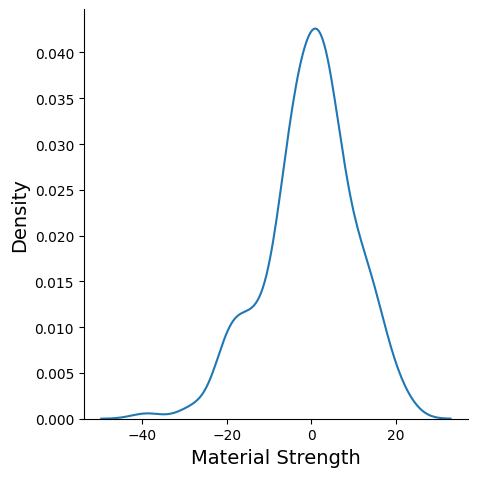

In [132]:
sns.displot(y_pred - y_test,kind='kde')

Figure shows that variance is nearly between -25 to 25 and outlier has larger variance

  ##  Normal equation 
    A^TA x = A^Tb  where A =feature matrix,b= target attributes,x=coefficient of independent variable
    x= A^Tb * inverse(A^TA)

In [133]:
# Adding  a column of ones to the matrix  for the intercept term
A = np.c_[np.ones((X_train.shape[0], 1)), X_train] # A is our features matrix, first column of A is for intercept term

# our goal is to calculate the x which  is the coefficient of  each  ,independent variable  by using the formula
#x= A^Tb * inverse(A^TA)

# Calculating the  dot product of  A^T and A i.e A^TA 
ATA = A.T.dot(A)

# Calculating the  dot product of  A^T and b i.e A^Tb 
ATb = A.T.dot(y_train)

# Calculating the inverse of A^TA
ATA_inverse = np.linalg.inv(ATA)

# Calculating  the  coefficient for each attribute and constant value (x) using A^Tb * inverse(A^TA)
x = ATb.dot(ATA_inverse)

# first element corresponds to intercept value and rest are coefficient of independent variable
intercept = x[0]
coefficients = x[1:]

# Print the optimal parameters
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 35.670549828178686
Coefficients: [ 7.76832246  4.03100906  1.94299869 -3.31158975  3.30423351 -0.81948983
 -2.69803738  9.55352965]


x vector contains the optimal parameters (intercept and coefficients of every features)

In [134]:
# Add a column of ones to the design matrix for the intercept term for X_test
A_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Calculate the predicted values 'b_pred' for X_test using the parameter vector 'x'
b_pred = A_test.dot(x)

# Optionally, you can evaluate the performance of the predictions using metrics
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared and RMSE for evaluation (assuming you have the true 'y_test' values)
r2 = r2_score(y_test, b_pred)
rmse = np.sqrt(mean_squared_error(y_test, b_pred))

print("R-squared:", r2)
print("RMSE:", rmse)




R-squared: 0.674075389195629
RMSE: 10.279778637690026


Solution of validation test using  normal equation

##  Equation of response variable
$$
y = 7.76832246 X1 + 4.03100906 X2 + 1.94299869 X3 -3.31158975 X4 + 3.30423351 X5 -0.81948983 X6  -2.69803738 X7 + 9.55352965 X8
     +35.670549828178686
$$


In [135]:
#finding the sixth columns name of training data with smallest coefficient
train.columns[5]

'coarse_aggregate'

1. The coefficients of most attributes in the regression model have similar magnitudes, suggesting that they have a similar impact on the strength of materials. However, the attribute "coarse_aggregate" has a relatively smaller coefficient, indicating that it has a lesser impact on material strength compared to the other attributes.
2. Among the eight attributes considered,three of them exhibit a negative relationship with the strength of materials. In other words, as these two attributes increase, the strength of materials tends to decrease, while the remaining six attributes have a positive relationship with material strength, meaning that as they increase, the strength of materials generally increases.
3. the intercept is much higher than all the coefficients, it indicate that the baseline value is a dominant factor in explaining the response variable, and the other attributes have relatively smaller effects.
 

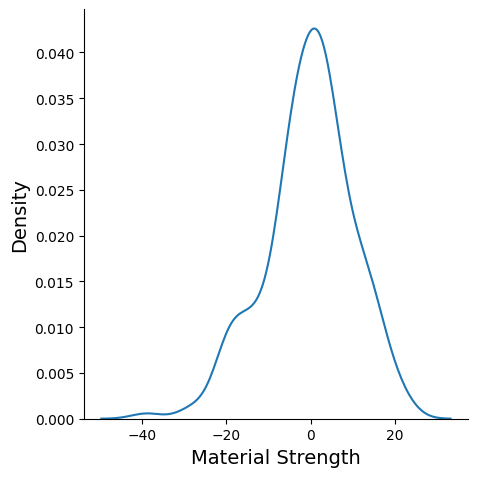

In [136]:
sns.displot(b_pred - y_test,kind='kde')

In [137]:
for i in trainc['blast_furnace_slag']:
    q1=trainc['blast_furnace_slag'].quantile(0.25)
    q3=trainc['blast_furnace_slag'].quantile(0.75)
    iqr=q3-q1
    lower_tail=q1-1.5*iqr
    upper_tail = q3+1.5*iqr
    
    if i>upper_tail or i <lower_tail:
        trainc['blast_furnace_slag'] = trainc['blast_furnace_slag'].replace(i,np.mean(trainc['blast_furnace_slag']))

In [138]:
for i in trainc['age']:
    q1=trainc['age'].quantile(0.25)
    q3=trainc['age'].quantile(0.75)
    iqr=q3-q1
    lower_tail=q1-1.5*iqr
    upper_tail = q3+1.5*iqr
    
    if i>upper_tail or i <lower_tail:
        trainc['age'] = trainc['age'].replace(i,np.mean(trainc['age']))

Trying different combination of attributes

In [139]:
trainc['Total_Aggregate'] = trainc['coarse_aggregate'] + trainc['fine_aggregate ']

In [140]:
trainc.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength,Total_Aggregate
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.000000,79.99,1716.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.000000,61.89,1731.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,50.050258,40.27,1526.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,46.648973,41.05,1526.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,40.905527,44.30,1803.9


In [141]:
corr_matrix = trainc.corr()
corr_matrix["Material Strength"].sort_values(ascending=False)

Material Strength     1.000000
age                   0.546500
cement                0.460156
superplasticizer      0.447484
blast_furnace_slag    0.099228
fly_ash               0.017349
coarse_aggregate     -0.186456
fine_aggregate       -0.208380
water                -0.278982
Total_Aggregate      -0.309995
Name: Material Strength, dtype: float64

In [142]:
trainc['supercement'] = trainc['cement']*trainc['superplasticizer']

trainc['cement_per_water'] = trainc['cement']/trainc['water']

trainc['superage'] = trainc['age']*trainc['superplasticizer']

trainc['cement_age'] = trainc['age']*trainc['cement']

trainc['water_age'] = trainc['age']/trainc['water']

trainc['Total_water_arggregate'] = trainc['Total_Aggregate']*trainc['water']

trainc['Total_Cement'] = trainc['cement']+trainc['blast_furnace_slag']+trainc['fly_ash']

trainc['Superplasticizer_Ratio'] = trainc['superplasticizer'] / trainc['cement']

trainc['Age_Squared'] = trainc['age'] ** 2

trainc['Log_Cement'] = np.log(trainc['cement'])
trainc['Log_Age'] = np.log(trainc['age'])

trainc['Cement_Water_Interact'] = trainc['cement'] * trainc['water']


corr_matrix = trainc.corr()
corr_matrix["Material Strength"].sort_values(ascending=False)

Material Strength         1.000000
cement_age                0.652467
Log_Age                   0.644568
Total_Cement              0.598526
water_age                 0.581820
superage                  0.568919
age                       0.546500
cement_per_water          0.531865
supercement               0.465308
cement                    0.460156
Log_Cement                0.449589
superplasticizer          0.447484
Age_Squared               0.423991
Cement_Water_Interact     0.329406
Superplasticizer_Ratio    0.324866
blast_furnace_slag        0.099228
fly_ash                   0.017349
coarse_aggregate         -0.186456
fine_aggregate           -0.208380
water                    -0.278982
Total_Aggregate          -0.309995
Total_water_arggregate   -0.496462
Name: Material Strength, dtype: float64

In [143]:
trainc.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age', 'Material Strength',
       'Total_Aggregate', 'supercement', 'cement_per_water', 'superage',
       'cement_age', 'water_age', 'Total_water_arggregate', 'Total_Cement',
       'Superplasticizer_Ratio', 'Age_Squared', 'Log_Cement', 'Log_Age',
       'Cement_Water_Interact'],
      dtype='object')

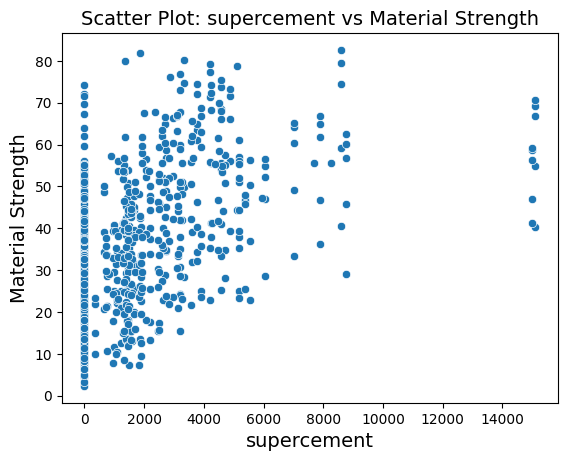

In [144]:
# Assuming 'data' is your DataFrame and 'target_variable' is the name of your target variable
sns.scatterplot(x=trainc['supercement'], y=trainc['Material Strength'])
plt.xlabel('supercement')
plt.ylabel('Material Strength')
plt.title(f'Scatter Plot: supercement vs Material Strength')
plt.show()

In [145]:
# Separate features (X) and target variable (y)
X0 = trainc.drop(columns=['Material Strength'])  # Remove the target column
y0 = trainc['Material Strength']

In [146]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X0, y0, test_size=0.25, random_state=42)

In [147]:
X_trainc.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Total_Aggregate,supercement,...,superage,cement_age,water_age,Total_water_arggregate,Total_Cement,Superplasticizer_Ratio,Age_Squared,Log_Cement,Log_Age,Cement_Water_Interact
217,190.3,0.0,125.2,161.9,9.9,1088.1,802.6,56.0,1890.7,1883.97,...,554.4,10656.8,0.345893,306104.33,315.5,0.052023,3136.0,5.248602,4.025352,30809.57
237,213.8,98.1,24.5,181.7,6.7,1066.0,785.5,56.0,1851.5,1432.46,...,375.2,11972.8,0.308200,336417.55,336.4,0.031338,3136.0,5.365041,4.025352,38847.46
525,359.0,19.0,141.0,154.0,10.9,942.0,801.0,3.0,1743.0,3913.10,...,32.7,1077.0,0.019481,268422.00,519.0,0.030362,9.0,5.883322,1.098612,55286.00
324,252.3,0.0,98.8,146.3,14.2,987.8,889.0,3.0,1876.8,3582.66,...,42.6,756.9,0.020506,274575.84,351.1,0.056282,9.0,5.530619,1.098612,36911.49
152,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56.0,1700.5,4206.16,...,649.6,20305.6,0.339600,280412.45,551.6,0.031991,3136.0,5.893300,4.025352,59792.74


In [148]:
X_testc.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Total_Aggregate,supercement,...,superage,cement_age,water_age,Total_water_arggregate,Total_Cement,Superplasticizer_Ratio,Age_Squared,Log_Cement,Log_Age,Cement_Water_Interact
452,173.8,93.4,159.9,172.3,9.7,1007.2,746.6,56.0,1753.8,1685.86,...,543.2,9732.8,0.325015,302179.74,427.1,0.055811,3136.0,5.157905,4.025352,29945.74
737,238.0,0.0,0.0,186.0,0.0,1119.0,789.0,28.0,1908.0,0.00,...,0.0,6664.0,0.150538,354888.00,238.0,0.000000,784.0,5.472271,3.332205,44268.00
350,213.5,0.0,174.2,154.6,11.7,1052.3,775.5,14.0,1827.8,2497.95,...,163.8,2989.0,0.090556,282577.88,387.7,0.054801,196.0,5.363637,2.639057,33007.10
790,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,90.0,1853.0,0.00,...,0.0,31410.0,0.468750,355776.00,349.0,0.000000,8100.0,5.855072,4.499810,67008.00
385,520.0,0.0,0.0,170.0,5.2,855.0,855.0,28.0,1710.0,2704.00,...,145.6,14560.0,0.164706,290700.00,520.0,0.010000,784.0,6.253829,3.332205,88400.00


In [149]:
# X_trainc = (X_trainc - X_trainc.mean()) / X_trainc.std()
# X_testc = (X_testc - X_testc.mean()) / X_testc.std()


Again  i am using different model to understand how combination of different attributes has affected results of each model

In [150]:
li=LinearRegression()
rd = Ridge()
la = Lasso()
byrd = BayesianRidge()

models = [li,rd, la, byrd]
for model in models:
    model  = model.fit(X_trainc, y_trainc)
    y_pred = model.predict(X_testc)
    r2_score = metrics.r2_score(y_testc, y_pred).round(3)
    RMSE = np.sqrt(metrics.mean_squared_error(y_testc,y_pred)).round(3)
    print('\n', model,'\n', 'R2_score:', r2_score,'\n', 'RMSE:', RMSE, '\n')


 LinearRegression() 
 R2_score: 0.835 
 RMSE: 7.322 


 Ridge() 
 R2_score: 0.836 
 RMSE: 7.292 


 Lasso() 
 R2_score: 0.815 
 RMSE: 7.743 


 BayesianRidge() 
 R2_score: 0.833 
 RMSE: 7.348 



In [151]:
trainc.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength,Total_Aggregate,...,superage,cement_age,water_age,Total_water_arggregate,Total_Cement,Superplasticizer_Ratio,Age_Squared,Log_Cement,Log_Age,Cement_Water_Interact
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.000000,79.99,1716.0,...,70.0,15120.000000,0.172840,277992.0,540.0,0.00463,784.000000,6.291569,3.332205,87480.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.000000,61.89,1731.0,...,70.0,15120.000000,0.172840,280422.0,540.0,0.00463,784.000000,6.291569,3.332205,87480.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,50.050258,40.27,1526.0,...,0.0,16641.710696,0.219519,347928.0,475.0,0.00000,2505.028299,5.806640,3.913028,75810.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,46.648973,41.05,1526.0,...,0.0,15510.783542,0.204601,347928.0,475.0,0.00000,2176.126687,5.806640,3.842651,75810.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,40.905527,44.30,1803.9,...,0.0,8123.837602,0.213050,346348.8,331.0,0.00000,1673.262114,5.291293,3.711265,38131.2


In [152]:
y_testc.head()

452    48.99
737    17.54
350    33.70
790    39.49
385    60.28
Name: Material Strength, dtype: float64

In [153]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


 ## Part 3 : OSI Library

Here i've built two model, first model i.e model A contain datasets with datacleaning  and some preprocessing like removing duplicates,scaling and imputing outlier but in second model i.e model B i have created some new attributes by applying different combination  between attributes. Now  we will understand how significant the different attributes by using OSI library.

In [154]:
import statsmodels.api as sm


# For Model A
X_A = sm.add_constant(X_train)  # Add a constant term for intercept
model_A = sm.OLS(y_train, X_train).fit()

# For Model B (with different features or transformations)
X_B = sm.add_constant(X_trainc)  # Add a constant term for intercept
model_B = sm.OLS(y_trainc, X_trainc).fit()

In [155]:
# For Model A
print("modelA :",model_A.summary())

# For Model B
print("modelB :",model_B.summary())


modelA :                                  OLS Regression Results                                
Dep. Variable:      Material Strength   R-squared (uncentered):                   0.137
Model:                            OLS   Adj. R-squared (uncentered):              0.125
Method:                 Least Squares   F-statistic:                              11.40
Date:                Sun, 03 Sep 2023   Prob (F-statistic):                    4.62e-15
Time:                        23:58:27   Log-Likelihood:                         -2921.8
No. Observations:                 582   AIC:                                      5860.
Df Residuals:                     574   BIC:                                      5895.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

**Model 1:**

     Dependent Variable: Material Strength
     R-squared (uncentered): 0.137
     Adjusted R-squared (uncentered): 0.125
     F-statistic: 11.39
     Prob (F-statistic): 4.80e-15
     Number of Observations: 582

* model appears to have a relatively low R-squared value (0.137), indicating that only about 13.7% of the variability in Material Strength is explained by the independent variables. The F-statistic is significant (p < 0.001), suggesting that the model as a whole is statistically significant.
     
* x8 i.e age  has a very low p-value (p < 0.001), suggesting it is a significant predictor, while x3, x4, x6, and x7 have p-values > 0.05, indicating they are not statistically significant predictors.



**Model 2:**

        Dependent Variable: Material Strength
        R-squared: 0.875
        Adjusted R-squared: 0.871
        F-statistic: 207.8
        Prob (F-statistic): 1.43e-239
        Number of Observations: 582
        
        
* This model, in contrast to Model 1, has a much higher R-squared value (0.875), indicating that approximately 87.5% of the variability in Material Strength is explained by the independent variables. The F-statistic is also highly significant (p < 0.001), indicating that the model as a whole is statistically significant.

*  includes 19 independent variables, out 19 attributes like cement, water,log age,superplastiser,cement_age,water_age has (p < 0.001), suggesting it is a significant predictor.

**Interpretation and Comparison:**

- R-squared Value: Model 2 has a significantly higher R-squared value compared to Model 1, indicating that it explains a much larger proportion of the variance in Material Strength. This suggests that Model 2 is likely a better fit for the data.

- Number of Independent Variables: Model 2 includes a larger number of independent variables (19) compared to Model 1 (8). However, having more variables doesn't necessarily make a model better. It's important to consider  other assepect  such as the significance of these variables and potential issues like multicollinearity.

- F-statistic: Both models have highly significant F-statistics, indicating that they are statistically significant as a whole.

- Variable Significance: In Model 2, we can assess the significance of each independent variable using their respective p-values. Variables with low p-values are considered more significant in predicting Material Strength.

- Multicollinearity: The notes in Model 2 suggest that there might be strong multicollinearity problems.As some attributes are highly  correlated to each other as they are created from the other originally available attributes

- Model Fit: Model 2 appears to have a better fit to the data based on the higher R-squared value, but we should also consider the practical significance of the variables and the potential mentione dissues .

Remember that the choice of the model should not solely rely on statistical properties but also on domain knowledge and the specific objectives of our analysis.

 ## Gradient Descent


Learning Rate: 0.001
Iteration 0: Training Loss = 671.4947568391027, Validation Loss = 38.209312503297895
Iteration 100: Training Loss = 540.311154747557, Validation Loss = 34.491732088072226
Iteration 200: Training Loss = 443.02645600112186, Validation Loss = 31.419182095751168
Iteration 300: Training Loss = 366.450399782831, Validation Loss = 28.756252827361084
Iteration 400: Training Loss = 304.6970120319588, Validation Loss = 26.40457297651064
Iteration 500: Training Loss = 254.4180361638402, Validation Loss = 24.313824818111556
Iteration 600: Training Loss = 213.31971144616745, Validation Loss = 22.451668707618193
Iteration 700: Training Loss = 179.66418142964633, Validation Loss = 20.793444460363624
Iteration 800: Training Loss = 152.0746880413951, Validation Loss = 19.318472012681088
Iteration 900: Training Loss = 129.4404644199958, Validation Loss = 18.008591206215453
RMSE: 16.858418723037893
R2 Score: 0.12343666087524297


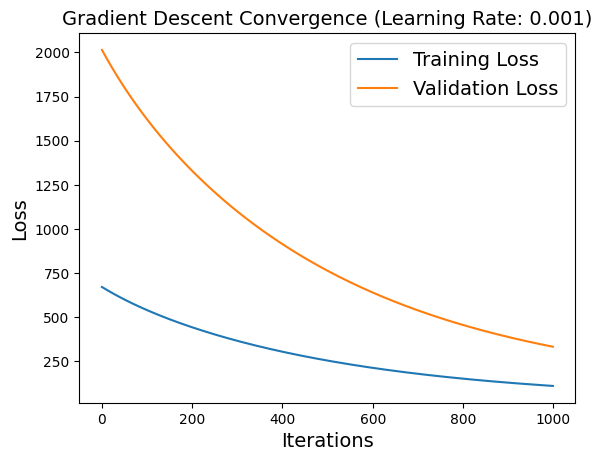

Learned Parameters (theta): [ 1.49389741  2.39370211  0.90634585  0.42374491  1.45271355  0.64225001
 -0.28183345  1.76277376 -0.3223084   1.12240773  1.62435246  1.25569438
  1.54906401  1.82816971 -0.45035546  2.68818196  1.636084    0.52708028
  1.44428403  3.62943122  1.2962065  22.92234728]

Learning Rate: 0.01
Iteration 0: Training Loss = 671.4947568391027, Validation Loss = 37.832877364985116
Iteration 100: Training Loss = 110.11370112827194, Validation Loss = 16.701634078474257
Iteration 200: Training Loss = 36.46260503856089, Validation Loss = 10.645349265679135
Iteration 300: Training Loss = 24.91799405561051, Validation Loss = 9.03016788037296
Iteration 400: Training Loss = 22.334921351954396, Validation Loss = 8.494279649028854
Iteration 500: Training Loss = 21.339279801227367, Validation Loss = 8.241231749316826
Iteration 600: Training Loss = 20.787926107021534, Validation Loss = 8.093582246395428
Iteration 700: Training Loss = 20.436763010119215, Validation Loss = 7.99896

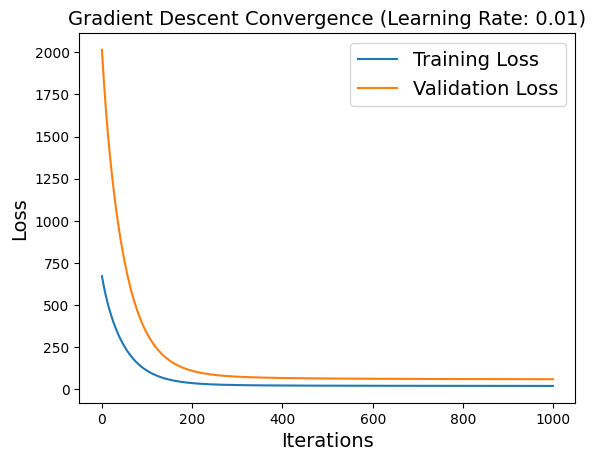

Learned Parameters (theta): [ 1.75296822  2.79532348  0.12526895 -0.41920649  1.18141512  0.19348537
 -0.12571783  1.88053915 -0.51130972 -1.38196248  2.07861783  0.20637646
 -0.2127274   2.21704217 -1.6961643   2.79825805  3.10139001 -3.04466679
  1.80946038  9.3485566   1.13395082 35.66905306]

Learning Rate: 0.1
Iteration 0: Training Loss = 671.4947568391027, Validation Loss = 34.23899220096927
Iteration 100: Training Loss = 19.903354964219645, Validation Loss = 7.856497894392841
Iteration 200: Training Loss = 19.461681080428697, Validation Loss = 7.796660017159951
Iteration 300: Training Loss = 19.325519272060056, Validation Loss = 7.796154420105324
Iteration 400: Training Loss = 19.240919742032787, Validation Loss = 7.787087038623085
Iteration 500: Training Loss = 19.1733299451477, Validation Loss = 7.772690580684549
Iteration 600: Training Loss = 19.115395895560386, Validation Loss = 7.75675077237951
Iteration 700: Training Loss = 19.064758291229907, Validation Loss = 7.741024851

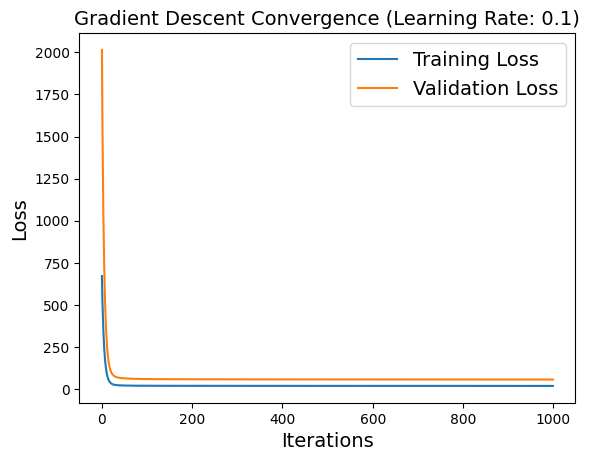

Learned Parameters (theta): [ 3.01099526  2.31287384 -0.83798315  0.45176004  3.59874978 -0.32220176
 -0.33870417  2.98762607 -1.05540726 -5.34430162  5.37487726  0.12576295
 -1.81606472  3.7521851  -0.57111122  3.08329281  4.27521592 -4.40261346
  1.32185108  9.44908481 -1.91288749 35.67054983]

Learning Rate: 0.2
Iteration 0: Training Loss = 671.4947568391027, Validation Loss = 30.70146901825442
Iteration 100: Training Loss = 19.4606833040731, Validation Loss = 7.796616323933793
Iteration 200: Training Loss = 19.240765051654996, Validation Loss = 7.787085217001844
Iteration 300: Training Loss = 19.115287471124617, Validation Loss = 7.756597590137053
Iteration 400: Training Loss = 19.020057496838202, Validation Loss = 7.726021329573713
Iteration 500: Training Loss = 18.945514934506054, Validation Loss = 7.699695792528348
Iteration 600: Training Loss = 18.886166099567514, Validation Loss = 7.67757905057407
Iteration 700: Training Loss = 18.838125595862852, Validation Loss = 7.658997182

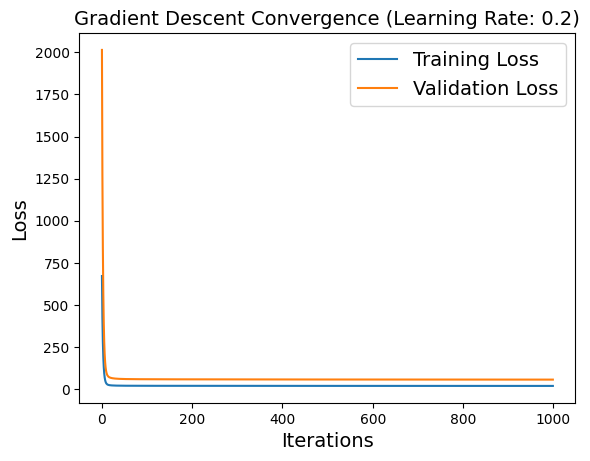

Learned Parameters (theta): [ 3.85458361e+00  1.88317334e+00 -1.09220860e+00  9.40361983e-01
  5.99799417e+00 -4.41466618e-01 -5.33082568e-01  3.46078829e+00
 -1.30214868e+00 -7.39660513e+00  6.89111907e+00  1.94791385e-02
 -1.76440983e+00  4.31252666e+00  8.83447481e-02  3.44190391e+00
  3.61607563e+00 -5.09145111e+00  7.96595063e-01  9.05247110e+00
 -3.97542624e+00  3.56705498e+01]

Learning Rate: 0.5
Iteration 0: Training Loss = 671.4947568391027, Validation Loss = 24.902795930904034
Iteration 100: Training Loss = 1.635095053821062e+65, Validation Loss = 1.1571572625269505e+33
Iteration 200: Training Loss = 1.1216400432825807e+129, Validation Loss = 9.584018332119629e+64
Iteration 300: Training Loss = 7.694209481919417e+192, Validation Loss = 7.937849967758038e+96
Iteration 400: Training Loss = 5.278062236294805e+256, Validation Loss = 6.574430466130055e+128
Iteration 500: Training Loss = inf, Validation Loss = inf


C:\Users\Sweta\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Sweta\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Sweta\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\Sweta\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Sweta\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_s

Iteration 600: Training Loss = inf, Validation Loss = inf
Iteration 700: Training Loss = inf, Validation Loss = inf


C:\Users\Sweta\AppData\Local\Temp\ipykernel_7824\1256773799.py:40: RuntimeWarning: overflow encountered in square
  training_loss = np.sum(error**2) / (2 * m)
C:\Users\Sweta\AppData\Local\Temp\ipykernel_7824\1256773799.py:46: RuntimeWarning: overflow encountered in square
  valid_loss         =  np.sum(error**2) / (2 * len(y_testc))
C:\Users\Sweta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:478: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\Sweta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
C:\Users\Sweta\AppData\Local\Temp\ipykernel_7824\1256773799.py:40: RuntimeWarning: overflow encountered in square
  training_loss = np.sum(error**2) / (2 * m)
C:\Users\Sweta\AppData\Local\Te

Iteration 800: Training Loss = inf, Validation Loss = inf
Iteration 900: Training Loss = inf, Validation Loss = inf


C:\Users\Sweta\AppData\Local\Temp\ipykernel_7824\1256773799.py:40: RuntimeWarning: overflow encountered in square
  training_loss = np.sum(error**2) / (2 * m)
C:\Users\Sweta\AppData\Local\Temp\ipykernel_7824\1256773799.py:46: RuntimeWarning: overflow encountered in square
  valid_loss         =  np.sum(error**2) / (2 * len(y_testc))
C:\Users\Sweta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:478: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\Sweta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
C:\Users\Sweta\AppData\Local\Temp\ipykernel_7824\1256773799.py:40: RuntimeWarning: overflow encountered in square
  training_loss = np.sum(error**2) / (2 * m)
C:\Users\Sweta\AppData\Local\Te

ValueError: Input contains NaN.

In [157]:
from collections import defaultdict

X_Trainc = (X_trainc - X_trainc.mean()) / X_trainc.std()
X_Testc = (X_testc - X_testc.mean()) / X_testc.std()
# Add a bias term (intercept) to the features
X_Trainc['bias'] = 1
X_Testc['bias'] = 1

# Define the hyperparameters for gradient descent
learning_rates = [0.001,0.01, 0.1,0.2, 0.5]  # Experiment with different learning rates
num_iterations = 1000
initial_theta = np.ones(X_trainc.shape[1])

# Initializing arrays to store training and validation loss for each learning rate
training_losses = {}
validation_losses = {}

# Gradient Descent function which 
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    training_loss_history = []
    validation_loss_history = []
    validation_report = defaultdict(list)
    

    for i in range(num_iterations):
        # Calculate the predicted values
        predictions = np.dot(X, theta)
        
        # Calculate the error (difference between predicted and actual values)
        error = predictions - y
        
        # Calculate the gradient (derivative of the cost function)
        gradient = np.dot(X.T, error) / m
        
        # Update the parameters (theta)
        theta -= learning_rate * gradient
        
        # Calculate and store the training loss (mean squared error)
        training_loss = np.sum(error**2) / (2 * m)
        training_loss_history.append(training_loss)

        # Calculate and store the validation loss
        validation_predictions = np.dot(X_Testc.values, theta)
        validation_error   = validation_predictions - y_testc.values
        valid_loss         =  np.sum(error**2) / (2 * len(y_testc))
        validation_loss_history.append(valid_loss)
        validation_loss    = np.sqrt(metrics.mean_squared_error(y_testc,validation_predictions))
        r2_score           = metrics.r2_score(y_testc,validation_predictions)
        validation_report["validation_loss"].append(validation_loss)
        validation_report["r2_score"].append(r2_score)
        
        
# for every 100 iteration print the training loss and validation loss
        if i % 100 == 0: 
            print(f'Iteration {i}: Training Loss = {training_loss}, Validation Loss = {validation_loss}')
    print("RMSE:",validation_report["validation_loss"][-1])
    print("R2 Score:", validation_report["r2_score"][-1])
    return theta, training_loss_history, validation_loss_history

# Experimenting  with different learning rates
for lr in learning_rates:
    initial_theta = np.ones(X_trainc.shape[1])
    print(f'\nLearning Rate: {lr}')
    theta, training_loss_history, validation_loss_history = gradient_descent(
        X_Trainc.values, y_trainc.values, initial_theta, lr, num_iterations
    )
    # Plot the training and validation loss history to visualize convergence
    plt.plot(range(num_iterations), training_loss_history, label='Training Loss')
    plt.plot(range(num_iterations), validation_loss_history, label='Validation Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Gradient Descent Convergence (Learning Rate: {lr})')
    plt.legend()
    plt.show()

    # Store training and validation losses for this learning rate
    training_losses[lr] = training_loss_history
    validation_losses[lr] = validation_loss_history

    # Print the learned parameters (theta)
    print('Learned Parameters (theta):', theta)

- The use of a smaller learning rate, such as 0.001, results in gradual convergence, taking more time but eventually leading to a reasonable solution.
- Opting for a moderate learning rate like 0.01 leads to quicker convergence and produces favorable outcomes.
- When employing an excessively high learning rate, e.g., 0.5, the algorithm initially achieves a very low loss in comparison to other rates within a set number of iterations . However, as the iterations progress beyond this point, the loss begins to rise significantly, eventually approaching infinity. This behavior indicates divergence, where the algorithm fails to find the optimal solution as more iterations are performed.
- The most effective learning rate is 0,2, as it facilitates convergence more efficiently than other rates, making it the preferred choice.

 ## KNN

In [158]:
from sklearn.neighbors import KNeighborsRegressor

Number of neighbors (k) is a hyperparameter that we need to specify when training the model. It determines how many neighboring data points should be considered when making predictions for a new or unseen data point. 

In [159]:
# defining different value of k to find optimal value of k which has best result i.e high r2 score and
# less root mean square error(rmse)
k_values= [1,3,5,7,8,9]

# initalizing  with best k as 0
best_k =-1
best_r2_score = -10 # Initialize with negative number

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k) 
    knn.fit(X_trainc, y_trainc)
    y_pred = knn.predict(X_testc)
    r2_score = metrics.r2_score(y_testc, y_pred).round(3) # values are rounded to three decimal places.
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred)).round(3)
    print('\n', f'KNearestNeighbors (K={k})', '\n', 'R2_score:', r2_score, '\n', 'RMSE:', RMSE, '\n')
    
    # Check if this K has a higher R2 score than the current best
    if r2_score > best_r2_score:
        best_r2_score = r2_score
        best_k = k

print(f'The K value with the highest R2 score is K={best_k} with R2={best_r2_score}')



 KNearestNeighbors (K=1) 
 R2_score: 0.704 
 RMSE: 9.791 


 KNearestNeighbors (K=3) 
 R2_score: 0.716 
 RMSE: 9.597 


 KNearestNeighbors (K=5) 
 R2_score: 0.743 
 RMSE: 9.132 


 KNearestNeighbors (K=7) 
 R2_score: 0.72 
 RMSE: 9.532 


 KNearestNeighbors (K=8) 
 R2_score: 0.71 
 RMSE: 9.704 


 KNearestNeighbors (K=9) 
 R2_score: 0.707 
 RMSE: 9.753 

The K value with the highest R2 score is K=5 with R2=0.743


Observation:

1. We can see that as we increase the value of K in K-Nearest Neighbours (KNN) regression, the R2 score decreases. When K is small (e.g., K=1), the model fits the data more closely, resulting in a higher R2 score. As K grows, the model is influenced by a greater number of neighbours, resulting in a decrease in R2.

2. K in KNN represents a trade-off between bias and variance. Smaller values of K (e.g., K=1) lead to low bias but high variance, meaning the model may capture noise in the data. Larger values of K (e.g., K=7, K=8) lead to higher bias but lower variance, meaning the model is more stable but here  it less accuracy .  SO,The optimal K value strikes a balance between these trade-offs.

3. K=5 provides the best balance between bias and variance, resulting in the highest coefficient of determination (R2).lowest root mean square error.

The KNearestNeighbors (K=5) model has an R-squared (R2) score of 0.809 and a Root Mean Square Error (RMSE) of 7.863 .

Comparatively, the parametric approaches, including LinearRegression, Ridge, Lasso, and BayesianRidge, have the following performance:

1. LinearRegression() 
   R2_score: 0.821 
   RMSE: 7.624 


2.  Ridge() 
    R2_score: 0.822 
    RMSE: 7.594 


3. Lasso() 
   R2_score: 0.791 
   RMSE: 8.239 


4. BayesianRidge() 
   R2_score: 0.821 
   RMSE: 7.628 

In comparison to the parametric approaches, the KNearestNeighbors (KNN) model has a slightly lower R2_score and a slightly higher RMSE. Here are some pros and cons of KNN versus parametric approaches:



**Pros of KNearestNeighbors (KNN):**
1. **Non-Parametric:** KNN is a non-parametric method, meaning it makes no assumptions about the underlying data distribution. This can be advantageous when dealing with complex, non-linear relationships.

2. **Simple to Implement:** KNN is relatively easy to understand and implement. It doesn't require extensive parameter tuning or feature engineering.

3. **Local Patterns:** KNN captures local patterns in the data, which can be useful for cases where data points are clustered in different regions of the feature space.

**Cons of KNearestNeighbors (KNN):**
1. **Computational Intensive:** KNN can be computationally intensive, especially with large datasets, as it needs to compute distances between data points for predictions.

2. **Sensitive to Noise:** KNN is sensitive to noisy data points and outliers, which can adversely affect its performance.

3. **Hyperparameter Tuning:** The choice of the value of K (the number of neighbors) can significantly impact the model's performance, and finding the optimal K value can be challenging.

**Pros of Parametric Approaches (LinearRegression, Ridge, Lasso, BayesianRidge):**
1. **Efficiency:** Parametric models like Linear Regression are computationally efficient, making them suitable for large datasets.

2. **Interpretability:** Parametric models provide interpretable coefficients, allowing you to understand the relationship between input features and the target variable.

3. **Regularization:** Ridge and Lasso regression offer built-in regularization, which can help prevent overfitting and improve model generalization.

**Cons of Parametric Approaches:**
1. **Assumption of Linearity:** Parametric models assume a linear relationship between features and the target variable, which may not hold for all datasets.

2. **Limited to Specific Distributions:** These models are designed for specific types of distributions, and if the data doesn't conform to those assumptions, their performance may suffer.

In summary, Parametric models like Linear Regression can perform well when the underlying relationships are approximately linear and assumptions are met. KNN, on the other hand, can be a good choice when dealing with non-linear or complex data patterns but may require careful handling of hyperparameters and data preprocessing.

 ## Generalised linear model 

 There are three components in generalized linear models.
 1. Linear predictor
 2. Link function
 3. Probability distribution 

From the graph  the target variable distibution and it looked like a bell shaped curve and some independent variable has skewness towards some point.Though this is not a perfect normal distribution so i tried both gamma and normal distibution

But I am not so sure about the distribution of the target variable so i tried experimenting some other distribution also

Model : normal Glm

    Link function: identity Function
    Probability distribution: Gaussian  distribution

In [160]:
Normal_model = sm.GLM(y_trainc, X_trainc, family=sm.families.Gaussian(link=sm.families.links.identity()))

# Fit the GLM
result_N = Normal_model.fit()
coefficients = result_N.params
Normal_weights = np.array(coefficients)

# Print the summary of the GLM
print(result_N.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Material Strength   No. Observations:                  582
Model:                            GLM   Df Residuals:                      562
Model Family:                Gaussian   Df Model:                           19
Link Function:               identity   Scale:                          37.921
Method:                          IRLS   Log-Likelihood:                -1873.6
Date:                Mon, 04 Sep 2023   Deviance:                       21312.
Time:                        00:01:52   Pearson chi2:                 2.13e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9985
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
cement                     0

C:\Users\Sweta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [161]:
Normal_glm_predictions  = np.array(X_testc).dot(Normal_weights)
r2_score = metrics.r2_score(y_testc, Normal_glm_predictions).round(3) # values are rounded to three decimal places.
RMSE     = np.sqrt(metrics.mean_squared_error(y_test,Normal_glm_predictions)).round(3)
print("RMSE SCORE GLM Normal:", RMSE)
print("R2 SCORE GLM Normal:",r2_score)

RMSE SCORE GLM Normal: 7.322
R2 SCORE GLM Normal: 0.835


In [162]:
# Fit the Gamma GLM with inverse link
model = sm.GLM(y_trainc, X_trainc,family=sm.families.Gamma(link=sm.families.links.inverse_power()))

# Get the fitted results
results = model.fit()
# Assuming you have already fitted the GLM model and stored it in the variable 'results'
coefficients = results.params
gamma_weights = np.array(coefficients)
# Print the summary
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Material Strength   No. Observations:                  582
Model:                            GLM   Df Residuals:                      562
Model Family:                   Gamma   Df Model:                           19
Link Function:          inverse_power   Scale:                        0.057848
Method:                          IRLS   Log-Likelihood:                -2008.4
Date:                Mon, 04 Sep 2023   Deviance:                       34.767
Time:                        00:01:55   Pearson chi2:                     32.5
No. Iterations:                     7   Pseudo R-squ. (CS):             0.9766
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
cement                    -0

C:\Users\Sweta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
C:\Users\Sweta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [163]:
np.array(X_testc).shape

(194, 22)

In [164]:
gamma_glm_predictions  = np.array(X_testc).dot(gamma_weights)
r2_score = metrics.r2_score(y_testc, gamma_glm_predictions).round(3) # values are rounded to three decimal places.
RMSE     = np.sqrt(metrics.mean_squared_error(y_test,gamma_glm_predictions)).round(3)
print("RMSE SCORE GLM GAMMA:", RMSE)
print("R2 SCORE GLM GAMMA:",r2_score)

RMSE SCORE GLM GAMMA: 40.841
R2 SCORE GLM GAMMA: -4.145


Model : Poisson Regression  

        Link function: Natural log
        Probability distribution:Poission distribution
        

In [165]:
import statsmodels.api as sm

# Model : Poisson Regression (Log Link)
poisson_model = sm.GLM(y_trainc, sm.add_constant(X_trainc), family=sm.families.Poisson(link=sm.families.links.log()))
poisson_results = poisson_model.fit()
result3 = poisson_results.params
poission_weights = np.array(result3)
print(poisson_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:      Material Strength   No. Observations:                  582
Model:                            GLM   Df Residuals:                      562
Model Family:                 Poisson   Df Model:                           19
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1835.3
Date:                Mon, 04 Sep 2023   Deviance:                       597.43
Time:                        00:02:01   Pearson chi2:                     604.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9993
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
cement                     0

C:\Users\Sweta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [166]:
poission_glm_predictions  = np.array(X_testc).dot(poission_weights)
r2_score = metrics.r2_score(y_testc,poission_glm_predictions).round(3) # values are rounded to three decimal places.
RMSE     = np.sqrt(metrics.mean_squared_error(y_test,poission_glm_predictions)).round(3)
print("RMSE SCORE GLM poission:", RMSE)
print("R2 SCORE GLM poission:",r2_score)

RMSE SCORE GLM poission: 37.569
R2 SCORE GLM poission: -3.353


Model : Logistic Regression

    Link function: Log-Odds Function
    Probability distribution: Binomial  distribution

In [167]:
# Logistic regression
Logistic_model = sm.GLM(y_trainc, X_trainc, family=sm.families.Binomial(link=sm.families.links.logit()))
res = Logistic_model.fit()
result4 = res.params
logistic_weights = np.array(result4)
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Material Strength   No. Observations:                  582
Model:                            GLM   Df Residuals:                      562
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Mon, 04 Sep 2023   Deviance:                   1.6083e+06
Time:                        00:02:03   Pearson chi2:                 3.90e+21
No. Iterations:                     2   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
cement                  1.98

C:\Users\Sweta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(
C:\Users\Sweta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\Sweta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\Sweta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1057: RuntimeWarning: invalid value encountered in log
  n * np.log(1 - mu + 1e-20)) * var_weights
C:\Users\Sweta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1056: 

In [168]:
logistic_glm_predictions  = np.array(X_testc).dot(logistic_weights)
r2_score = metrics.r2_score(y_testc,logistic_glm_predictions).round(3) # values are rounded to three decimal places.
RMSE     = np.sqrt(metrics.mean_squared_error(y_test,logistic_glm_predictions)).round(3)
print("RMSE SCORE GLM logistic:", RMSE)
print("R2 SCORE GLM logistic:",r2_score)

RMSE SCORE GLM logistic: 2.608552444043999e+17
R2 SCORE GLM logistic: -2.0986923286065157e+32


## summary of GLM model
**1. Gaussian GLM Results (Identity Link Function):**

- Dep. Variable: Material Strength
- Model Family: Gaussian
- Link Function: Identity
- Scale: 37.921
- Log-Likelihood: -1873.6
- Deviance: 21312.0
- Pseudo R-squared: 0.9985
- RMSE Score: 7.322
- R2 Score: 0.835
- The Gaussian GLM with an identity link function is suitable for modeling continuous data.
- The RMSE of 7.322 indicates that the model has a reasonable predictive accuracy.
- The R2 score of 0.835 suggests that the model explains approximately 83.5% of the variance in Material Strength, which is relatively good.

**2. Gamma GLM Results (Inverse Power Link Function):**

- Dep. Variable: Material Strength
- Model Family: Gamma
- Link Function: Inverse Power
- Scale: 0.057848
- Log-Likelihood: -2008.4
- Deviance: 34.767
- Pseudo R-squared: 0.9766
- RMSE Score: 40.841
- R2 Score: -4.145

- The Gamma GLM with an inverse power link function is often used for modeling positive continuous data with right-skewness.
- The extremely high RMSE of 40.841 indicates that the model has a poor predictive accuracy.
- The negative R2 score of -4.145 suggests that the model does not fit the data well, and it may not be appropriate for this dataset.

**3. Poisson GLM Results (Log Link Function):**

- Dep. Variable: Material Strength
- Model Family: Poisson
- Link Function: Log
- Scale: 1.0000
- Log-Likelihood: -1835.3
- Deviance: 597.43
- Pseudo R-squared: 0.9993
- RMSE Score: 37.569
- R2 Score: -3.353
- The Poisson GLM with a log link function is typically used for count data.
- The RMSE of 37.569 suggests that the model has a significant prediction error.
- The negative R2 score of -3.353 indicates that the model is not explaining the variance in Material Strength well and may not be suitable for this dataset.

**4. Binomial GLM Results (Logit Link Function):**

- Dep. Variable: Material Strength
- Model Family: Binomial
- Link Function: Logit
- Scale: 1.0000
- Log-Likelihood: -inf
- Deviance: 1.6083e+06
- Pseudo R-squared: NaN
- RMSE Score: Extremely large value
- R2 Score: Extremely large and negative
- The Binomial GLM with a logit link function is typically used for binary classification problems.
- The model appears to have significant numerical issues, as indicated by the extremely large RMSE and R2 scores.
- These results suggest that the model did not converge or fit the data appropriately.


- Among the four models, the Gaussian GLM with the identity link function appears to be the most suitable for modeling Material Strength data, as it has a reasonable RMSE and R2 score.
- The other models (Gamma, Poisson, and Binomial) show various issues, including poor predictive accuracy and convergence problems.
- It's crucial to choose a GLM that is appropriate for the specific nature of your data and problem. In this case, the Gaussian GLM seems to be the best choice for modeling Material Strength.

 By comparing all the glm i.e generalised linear model ,normal distribution withb identity as link works best as it provide low rmse and high r2_score 

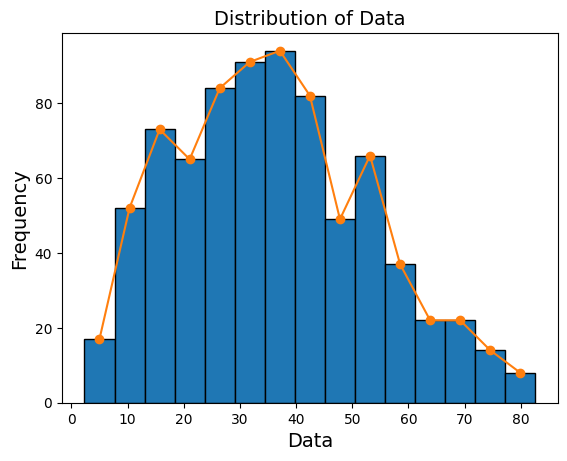

In [169]:
import matplotlib.pyplot as plt
import numpy as np

# Your list of data
data = trainc['Material Strength']
# Creating the histogram
counts, bins, _ = plt.hist(data, bins='auto', edgecolor='black')

# Getting the midpoints of each bin
bin_midpoints = (bins[:-1] + bins[1:]) / 2

# Plotting the line graph
plt.plot(bin_midpoints, counts, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Distribution of Data')

# Display the plot
plt.show()

 ## Summary of all model :
1. LinearRegression() 
   R2_score: 0.835 
   RMSE: 7.322 


2. Ridge() 
   R2_score: 0.836 
   RMSE: 7.292 


3. Lasso() 
   R2_score: 0.815 
   RMSE: 7.743 


4. BayesianRidge() 
   R2_score: 0.833 
   RMSE: 7.348 

5. KNearestNeighbors (K=5) 
   R2_score: 0.743 
   RMSE: 9.132 
   
6. Gradient descent method(learning rate= 0.2)
   RMSE: 7.618652180933435
   R2 Score: 0.8209781981890195
   
7. Glm model(gaussian distribution with identity link)
   R2 SCORE GLM Normal: 0.835
   RMSE SCORE GLM Normal: 7.322
 

By comparing the values of r2_score and root mean square error, I conclude that
 Ridge()is that due to highest R2_score and lowest RMSE of all the different models which we have worked on i.e gradient desent,glm,knn,ridge,lasso,linear

So i will give my result on the basis of ridge regresssion

In [170]:
testc.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,material_strength
0,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,7,NaN
1,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,NaN
2,339.0,0.0,0.0,185.0,0.0,1060.0,754.0,28,NaN
3,393.0,0.0,0.0,192.0,0.0,940.0,758.0,3,NaN
4,393.0,0.0,0.0,192.0,0.0,940.0,758.0,28,NaN


In [171]:
material_test= testc.drop(columns=['material_strength'])
material_test.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,7
1,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28
2,339.0,0.0,0.0,185.0,0.0,1060.0,754.0,28
3,393.0,0.0,0.0,192.0,0.0,940.0,758.0,3
4,393.0,0.0,0.0,192.0,0.0,940.0,758.0,28


In [172]:
testc['Total_Aggregate'] = testc['coarse_aggregate'] + testc['fine_aggregate ']
testc['supercement'] = testc['cement']*testc['superplasticizer']

testc['cement_per_water'] = testc['cement']/testc['water']

testc['superage'] = testc['age']*testc['superplasticizer']

testc['cement_age'] = testc['age']*testc['cement']

testc['water_age'] = testc['age']/testc['water']

testc['Total_water_arggregate'] = testc['Total_Aggregate']*testc['water']

testc['Total_Cement'] = testc['cement']+testc['blast_furnace_slag']+testc['fly_ash']

testc['Superplasticizer_Ratio'] = testc['superplasticizer'] / testc['cement']

testc['Age_Squared'] = testc['age'] ** 2

testc['Log_Cement'] = np.log(testc['cement'])
testc['Log_Age'] = np.log(testc['age'])

testc['Cement_Water_Interact'] = testc['cement'] * testc['water']

In [173]:
testc.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,material_strength,Total_Aggregate,...,superage,cement_age,water_age,Total_water_arggregate,Total_Cement,Superplasticizer_Ratio,Age_Squared,Log_Cement,Log_Age,Cement_Water_Interact
0,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,7,NaN,1895.0,...,0.0,1764.0,0.037838,350575.0,252.0,0.0,49,5.529429,1.945910,46620.0
1,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,NaN,1895.0,...,0.0,7056.0,0.151351,350575.0,252.0,0.0,784,5.529429,3.332205,46620.0
2,339.0,0.0,0.0,185.0,0.0,1060.0,754.0,28,NaN,1814.0,...,0.0,9492.0,0.151351,335590.0,339.0,0.0,784,5.826000,3.332205,62715.0
3,393.0,0.0,0.0,192.0,0.0,940.0,758.0,3,NaN,1698.0,...,0.0,1179.0,0.015625,326016.0,393.0,0.0,9,5.973810,1.098612,75456.0
4,393.0,0.0,0.0,192.0,0.0,940.0,758.0,28,NaN,1698.0,...,0.0,11004.0,0.145833,326016.0,393.0,0.0,784,5.973810,3.332205,75456.0


In [177]:
X_trainc = X_trainc[X_trainc.columns[:-1]]

In [181]:
final_test=testc.drop(columns=['material_strength'])
final_model= Ridge() 
model  = final_model.fit(X_trainc, y_trainc)

In [182]:
final_test

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Total_Aggregate,supercement,...,superage,cement_age,water_age,Total_water_arggregate,Total_Cement,Superplasticizer_Ratio,Age_Squared,Log_Cement,Log_Age,Cement_Water_Interact
0,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,7,1895.0,0.00,...,0.0,1764.0,0.037838,350575.00,252.0,0.000000,49,5.529429,1.945910,46620.00
1,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,1895.0,0.00,...,0.0,7056.0,0.151351,350575.00,252.0,0.000000,784,5.529429,3.332205,46620.00
2,339.0,0.0,0.0,185.0,0.0,1060.0,754.0,28,1814.0,0.00,...,0.0,9492.0,0.151351,335590.00,339.0,0.000000,784,5.826000,3.332205,62715.00
3,393.0,0.0,0.0,192.0,0.0,940.0,758.0,3,1698.0,0.00,...,0.0,1179.0,0.015625,326016.00,393.0,0.000000,9,5.973810,1.098612,75456.00
4,393.0,0.0,0.0,192.0,0.0,940.0,758.0,28,1698.0,0.00,...,0.0,11004.0,0.145833,326016.00,393.0,0.000000,784,5.973810,3.332205,75456.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,1638.4,2459.96,...,249.2,7739.2,0.155902,294256.64,482.7,0.032200,784,5.621849,3.332205,49641.44
226,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,1631.3,3350.88,...,291.2,9021.6,0.142857,319734.80,437.8,0.032278,784,5.775172,3.332205,63151.20
227,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,1672.4,905.85,...,170.8,4158.0,0.145304,322271.48,396.5,0.041077,784,5.000585,3.332205,28615.95
228,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,1778.5,1797.83,...,316.4,4454.8,0.159453,312304.60,345.8,0.071025,784,5.069533,3.332205,27937.96


In [183]:
prediction = model.predict(final_test)

In [184]:
prediction = model.predict(final_test)
df = pd.DataFrame({'Output': prediction})

# Save the DataFrame to a CSV file without a header
df.to_csv('predictions.csv', header=False, index=False)

In [185]:
df

,Output
0,10.021166
1,23.757001
2,34.123686
3,20.386065
4,40.596851
...,...
225,48.037513
226,43.248009
227,37.704044
228,45.627588


In [8]:
Predicted_strength= pd.read_csv("12041550_Sweta_Asg1_predictions.csv",header=None)
Predicted_strength.head()

,0
0,10.021166
1,23.757001
2,34.123686
3,20.386065
4,40.596851


In [7]:
Actual_strength= pd.read_csv("concrete_data_Solution.csv",header=None)
Actual_strength.head()

,0
0,13.71
1,19.69
2,31.65
3,19.11
4,39.58


In [11]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(Actual_strength, Predicted_strength)
mse = metrics.mean_squared_error(Actual_strength, Predicted_strength)
mape = metrics.mean_absolute_percentage_error(Actual_strength, Predicted_strength)
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:",mape)


MAE: 12.812610046587439
MSE: 355.49158556876705
RMSE: 0.5546002615160899
